# Modelo de AI para Identificación de Carros - DL
Jorge de Jesús Castro Vázquez | A01707735

18/Mayo/2025

# Avances
- Data Set Seleccionado [Car Dataset](https://www.kaggle.com/code/kshitij192/car-images-classification-using-cnn/notebook)
- Uso de Data Augmentation para cumplir con regla 80/20
  - Aplicación de ```
shear_range, zoom_range, channel_shift_range, height_shift_range y width_shift_range```




### Selección de Dataset
Al inicio me encontré con dos tipos de Dataset que me llamaron la atención.

1. [Credit Approval](https://archive.ics.uci.edu/dataset/27/credit+approval)
2. [Default of Credit Card Clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

Estos Dataset, de la página de UCI Machine Learning Repository,  están descritos en un arhivo separado por comas (csv, por sus siglas en inglés) y cumplen con el criterio de ser de **"Clasificación"**.

Sin embargo, dentro de clase hemos usado Dataset de imagenes y me apegaré a ello para este proyecto. De este modo encontre otro Dataset con imágenes de carros en Kaggle, llamado [Car Images Classification using CNN](https://www.kaggle.com/code/kshitij192/car-images-classification-using-cnn/notebook).

La composición de éste es como se ve a contiuación:


```
Cars Dataset
├── test
│   ├── Audi (199 imágenes)
│   ├── Hyundai Creta (67 imágenes)
│   ├── Mahindra Scorpio (75 imágenes)
│   ├── Rolls Royce (74 imágenes)
│   ├── Swift (102 imágenes)
│   ├── Tata Safari (106 imágenes)
│   └── Toyota Innova (190 imágenes)
└── train
    ├── Audi (814 imágenes)
    ├── Hyundai Creta (271 imágenes)
    ├── Mahindra Scorpio (316 imágenes)
    ├── Rolls Royce (311 imágenes)
    ├── Swift (424 imágenes)
    ├── Tata Safari (441 imágenes)
    └── Toyota Innova (775 imágenes)
```


# CODIGO

### Cargar Dataset de Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/M2/Cars Dataset"
!ls

/content/drive/MyDrive/M2/Cars Dataset
test  train


### Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import img_to_array, load_img

### Declaración de Path, tamaño de imageen y verificación

In [4]:

train_dir = os.path.join('train')
test_dir = os.path.join('test')
IMG_SIZE=128
!pwd

print(train_dir)
print(test_dir)

/content/drive/MyDrive/M2/Cars Dataset
train
test


### Generación de Data de Entrenamiento
Se hace un reescalamiento, se aplica zoom, shear, horizontal flip y rotación

In [8]:
# Generacion de Datos
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 10,
							width_shift_range = 0.1,
							height_shift_range = 0.1,
						  shear_range = 0.25,
							zoom_range = 0.3,
							horizontal_flip = True)

### Aplicar Data Augmentation

In [9]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (IMG_SIZE, IMG_SIZE),
							batch_size = 16,
							class_mode ='categorical',
							)

Found 3352 images belonging to 7 classes.


<Figure size 640x480 with 0 Axes>

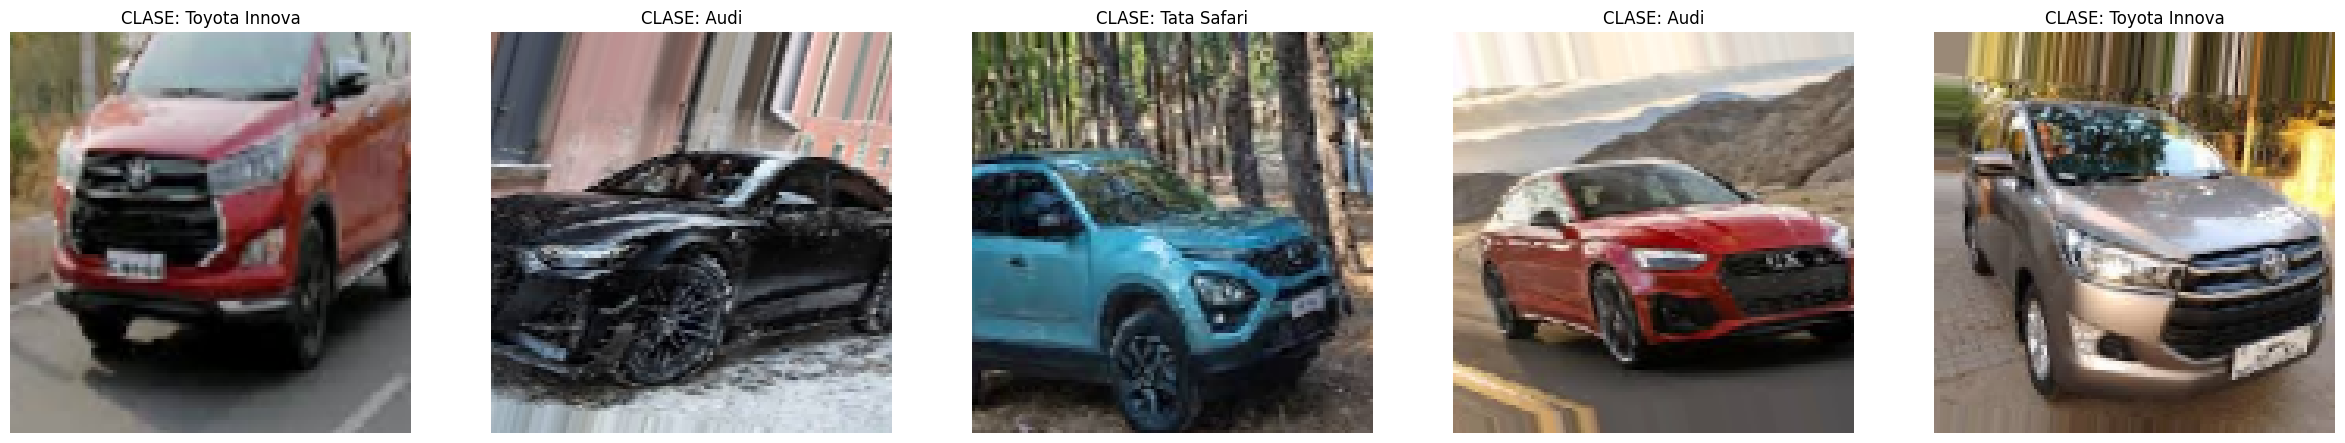

In [11]:
plt.figure()

f, axarr = plt.subplots(1, 5, figsize=(30, 8))
images, labels = train_generator[0]

# Mapa de Labels
label_map = {v: k for k, v in train_generator.class_indices.items()}

for i in range(5):
	axarr[i].imshow(images[i])
	class_index = tf.argmax(labels[i]).numpy()
	class_name = label_map[class_index]
	axarr[i].set_title(f"CLASE: {class_name}")
	axarr[i].axis('off')